In this Notebook I want to get answers to following questions:

- In which country you earn more money as developer?
- Which programming languages are popular
- Does the salary depend on working experience

First, let's take a look at the data, and see how I might answer the questions.

To get started, let's read in the necessary libraries we will need to wrangle our data: pandas and numpy. 
For plotting I usw matplotlib.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import myfunctions as t
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public_2020.csv')
df.head()

1. Question: In which country you earn more money as developer?
To answer this question i take the two necessary Colums from the dataset
The I drop NAN values to see the dependency of salary to the country of the working place

In [33]:
#Subset Salary Country
country_subset = df[['ConvertedComp', 'Country']]
sal_rm = country_subset.dropna(axis=0)# dataframe with rows for nan Salaries removed
sal_rm.head()

,ConvertedComp,Country
7,116000.0,United States
9,32315.0,United Kingdom
10,40070.0,United Kingdom
11,14268.0,Spain
12,38916.0,Netherlands


Afterwards the data is grouped by country and the mean values is calculated to get the mean salary.
Then a bar plot is created to answer the question

In [34]:
grouped_sal = sal_rm.groupby("Country").mean()

In [375]:
grouped_sal.plot(kind="barh", figsize=(120,120), fontsize = 50)

<AxesSubplot:ylabel='Country'>

In [36]:
grouped_sal['ConvertedComp'].nlargest(3)

Country
Nomadic                             310924.142857
Lao People's Democratic Republic    231275.250000
United States                       208826.496443
Name: ConvertedComp, dtype: float64

2. Question: Which programming languages are popular
To answer this question i take the two necessary Colums from the dataset
Then I create a function which counts the possivle answers for programming languange and gives me an procentual quantity
Afterwards an bar graph is plotted to show the result

In [376]:
#Subset Salary programming language
lan_subset = df[['ConvertedComp','LanguageWorkedWith']]
lan_rm.head()

,ConvertedComp,LanguageWorkedWith
7,116000.0,Python;SQL
9,32315.0,HTML/CSS;Java;JavaScript;Python;SQL
10,40070.0,C#;JavaScript;Swift
11,14268.0,HTML/CSS;JavaScript
12,38916.0,C;JavaScript;Python


In [377]:
lan_subset.LanguageWorkedWith.unique()

array(['C#;HTML/CSS;JavaScript', 'JavaScript;Swift',
       'Objective-C;Python;Swift', ...,
       'Bash/Shell/PowerShell;C;C++;Go;HTML/CSS;JavaScript;Kotlin;Python;Ruby;Rust;SQL',
       'Bash/Shell/PowerShell;C#;C++;HTML/CSS;JavaScript;Kotlin;PHP;SQL;VBA',
       'Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;JavaScript;Objective-C;Python;Swift'],
      dtype=object)

In [378]:
possible_vals = ["C#", "HTML/CSS", "JavaScript", "Swift", "Objective-C",
                 "Python", "Bash/Shell/PowerShell", "C",
                 "C++", "Go","Kotlin", "PHP", "SQL", "VBA", "Java"]

In [40]:
def clean(df):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        
    OUTPUT
        new - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    new = df['LanguageWorkedWith'].value_counts().reset_index()
    new.rename(columns={'index': 'prog_lan', 'LanguageWorkedWith': 'count'}, inplace=True)
    new_df = t.total_count(new, 'prog_lan', 'count', possible_vals)

    new_df.set_index('prog_lan', inplace=True)
    props_study_df = new_df/new_df.sum()
    return props_study_df
    
props_df = clean(lan_rm)
props_df

,count
prog_lan,
Java,0.149273
C,0.148270
JavaScript,0.130292
HTML/CSS,0.115331
SQL,0.106687
Python,0.076849
Bash/Shell/PowerShell,0.069032
C#,0.061254
PHP,0.045389


<AxesSubplot:ylabel='prog_lan'>

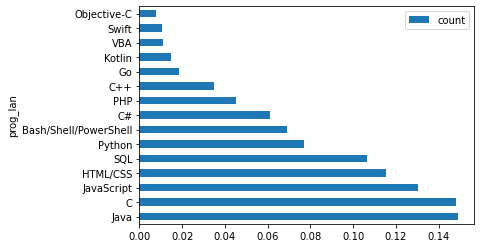

In [41]:
props_df.plot.barh()

3. Question: Does the salary depend on working experience
To answer this question i take the two necessary Colums from the dataset
Then a model is build to get the dependency between salary means an working experience
Afterwards a line and scatter is created plot to show the result

In [256]:
#Subset Salary workingexperience
working_subset = df[['ConvertedComp', 'YearsCodePro']]
work_rm = working_subset.dropna(axis=0)# dataframe with rows for nan Salaries removed
work_rm.head()

,ConvertedComp,YearsCodePro
7,116000.0,13
9,32315.0,4
10,40070.0,2
11,14268.0,7
12,38916.0,20


In [263]:
# the data is cleaned. Only numeric values that a model can be build
work_rm_clean = work_rm[work_rm.YearsCodePro.apply(lambda x: x.isnumeric())]
work_rm_clean

,ConvertedComp,YearsCodePro
7,116000.0,13
9,32315.0,4
10,40070.0,2
11,14268.0,7
12,38916.0,20
...,...,...
64141,129718.0,9
64142,984.0,2
64148,19428.0,5
64152,200.0,20


In [292]:
work_rm_clean['YearsCodePro'] = work_rm_clean['YearsCodePro'].astype(float) #make datatype from object to float

<ipython-input-292-087f04646642>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_rm_clean['YearsCodePro'] = work_rm_clean['YearsCodePro'].astype(float)


In [329]:
X = work_rm_clean[['YearsCodePro']]
y = work_rm_clean['ConvertedComp']

In [341]:
grouped_work = work_rm_clean.groupby("YearsCodePro")
grouped_work
work_sals = grouped_work.mean()

In [348]:
work_sals


,ConvertedComp
YearsCodePro,
1.0,66226.957165
2.0,73056.480605
3.0,80676.905745
4.0,83718.512599
5.0,98309.865295
6.0,99132.467593
7.0,110558.740081
8.0,101383.430532
9.0,116420.177984


In [357]:
y2 = work_sals.to_numpy()

In [363]:
X2 = np. arange(50)+1
X2 = X2.reshape(-1,1)

In [364]:
#splitting data into training and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .30, random_state=42)

In [365]:
#Four steps:

#Instantiate
lm_model2 = LinearRegression(normalize=True) 
lm_model2

LinearRegression(normalize=True)

In [366]:
lm_model2.fit(X2_train, y2_train) #modeling

LinearRegression(normalize=True)

In [367]:
y_test_preds = lm_model.predict(X_test)# Predictions here
r2_test = r2_score(y_test, y_test_preds) # Rsquared here

# Print r2 to see result
r2_test

0.012580054934903329

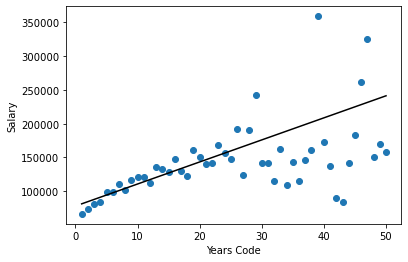

In [370]:
plt.scatter(X2,y2)
plt.plot(X2, lm_model.predict(X2),color='k')
plt.xlabel('Years Code')
plt.ylabel('Salary')
plt.show()